**Question-1 code**

In [0]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import time

In [0]:
start = time.clock()

x = 0.6             # initial value taken for x
y = 0.25            # initial value taken for y
learning_rate = 0.015  # Has to change the value of the Learning rate beacuse 
                       #of the function jumped to the undefined region.

w = np.array([x,y])

w_x = []
w_y = []
f = []

while (w[0]+w[1]<1) and (w[0]>0) and (w[1]>0):
    energy = - np.log(1-w[0]-w[1]) - np.log(w[0]) - np.log(w[1])
    f.append(energy) 
    
    w_x.append(w[0])
    w_y.append(w[1])
    
    grad_x = 1/(1-w[0]-w[1]) - 1/(w[0])
    grad_y = 1/(1-w[0]-w[1]) - 1/(w[1])
    gradient = np.array([grad_x, grad_y])
    
    update = learning_rate * gradient
    
    if np.linalg.norm(w - np.subtract(w,update)) < 0.001:  # has to give the threshold value
                                                            # for the code to avoid the infinite loop
        break
    else:
        w = np.subtract(w,update)

end = time.clock()
print ("Time taken for gradient descent: ", round((end-start), 4))

Time taken for gradient descent:  0.0023


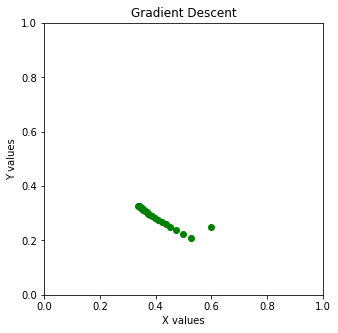

In [0]:
fig, ax = plt.subplots(figsize=(5,5))

plt.scatter(w_x, w_y, c = 'green')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Gradient Descent')

plt.show()

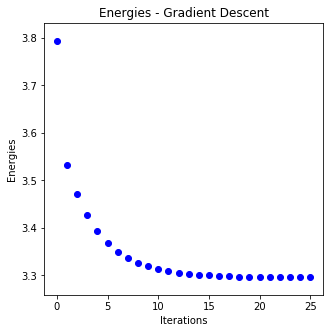

In [0]:
fig, ax = plt.subplots(figsize=(5,5))

plt.scatter(range(len(f)), f , c = 'blue')
plt.ylabel('Energies')
plt.xlabel('Iterations')
plt.title('Energies - Gradient Descent')

plt.show()

In [0]:
start = time.clock()

x = 0.75
y = 0.19
learning_rate = 1

w = np.array([x,y])

w_x = []
w_y = []
f = []

while ((w[0]+w[1])<1) and (w[0]>0) and (w[1]>0):
    energy = - np.log(1-w[0]-w[1]) - np.log(w[0]) - np.log(w[1])
    f.append(energy) 
    
    w_x.append(w[0])
    w_y.append(w[1])
    
    grad_x = 1/(1-w[0]-w[1]) - 1/(w[0])
    grad_y = 1/(1-w[0]-w[1]) - 1/(w[1]) 
    gradient = np.array([grad_x, grad_y])
    
    hessian_x1 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[0]*w[0])
    hessian_y2 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[1]*w[1])
    hessian_xy = 1/(1- w[0]-w[1]) * (1- w[0]-w[1])
    hessian = np.array([[hessian_x1, hessian_xy],[hessian_xy, hessian_y2]])
    
    update = learning_rate * np.matmul(inv(hessian), gradient)
    if np.linalg.norm(w - np.subtract(w,update)) < 0.00001:  # has to give the threshold value
                                                             # for the code to avoid the infinite loop
        break
    else:
        w = np.subtract(w,update)

end = time.clock()
print ("Time taken for Newton's method: ", round((end-start), 4))

Time taken for Newton's method:  0.0041


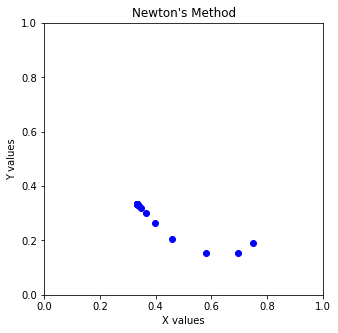

In [0]:
fig, ax = plt.subplots(figsize=(5,5))

plt.scatter(w_x, w_y, c = 'blue')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Newton\'s Method')

plt.show()

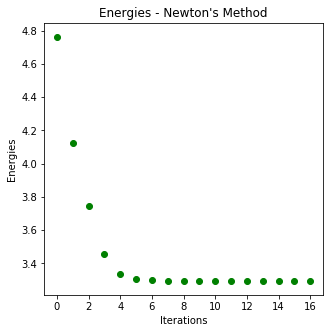

In [0]:

fig, ax = plt.subplots(figsize=(5,5))

plt.scatter(range(len(f)), f , c = 'g')
plt.ylabel('Energies')
plt.xlabel('Iterations')
plt.title('Energies - Newton\'s Method')

plt.show()

Theoratically Newton's method is faster than Gradient Descent.

But in my case,It is a bit slower.

The convergence speed may change from function to function.

Usually, Newton's method has inverse quadratic convergence compared to the inverse linear convergence of gradient descent

**Question-2 code**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = []
y = []
for i in range(50):
    x_temp = i + 1
    u = np.random.uniform(-1, 1)
    y_temp = i + 1 + u
    x.append(x_temp)
    y.append(y_temp)

In [0]:
# converting the summation into y*psuedo_inv_of_x gives us the most optimal w0 and w1 values
x_temp = np.linalg.inv(np.matmul(np.array([np.ones(50), x]), np.transpose(np.array([np.ones(50), x]))))
x_transpose = np.transpose(np.array([np.ones(50), x]))
x_psuedo_inv = np.matmul(x_transpose, x_temp)
w = np.matmul(np.array(y) , x_psuedo_inv)
print(w)

[0.10335704 1.00100651]


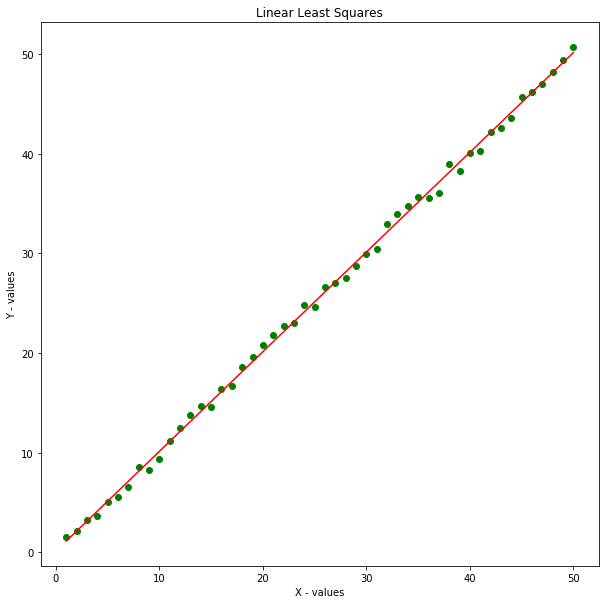

In [0]:
yn = np.polyval([w[1], w[0]], np.array(x))
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y, c = 'g')
plt.plot(x, yn, c = 'r')
plt.ylabel('Y - values')
plt.xlabel('X - values')
plt.title('Linear Least Squares')
plt.show()

**Question-2(f) code**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
x = []
y = []
for i in range(50):
    x_temp = i + 1
    u = np.random.uniform(-1, 1)
    y_temp = i + 1 + u
    x.append(x_temp)
    y.append(y_temp)

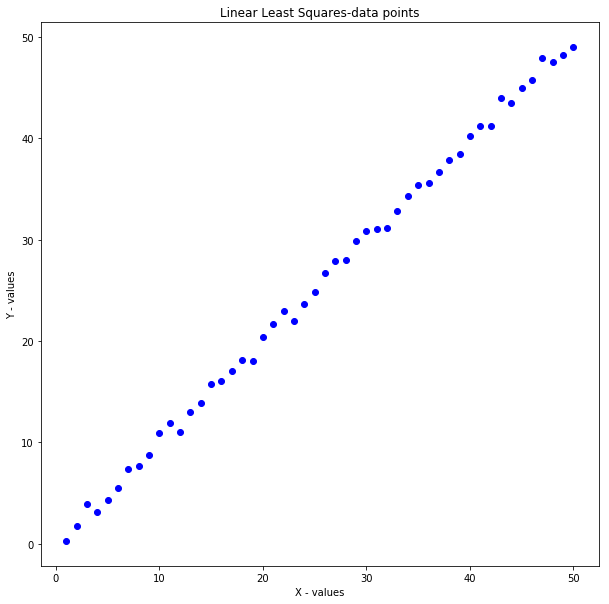

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y, c = 'blue')
plt.ylabel('Y - values')
plt.xlabel('X - values')
plt.title('Linear Least Squares-data points')
plt.show()

In [0]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 50  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*np.array(x) + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt w1
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt w0
    m = m - L * D_m  # Update w1
    c = c - L * D_c  # Update w0
    
print (m, c)

0.998047809769721 0.029653195417421625


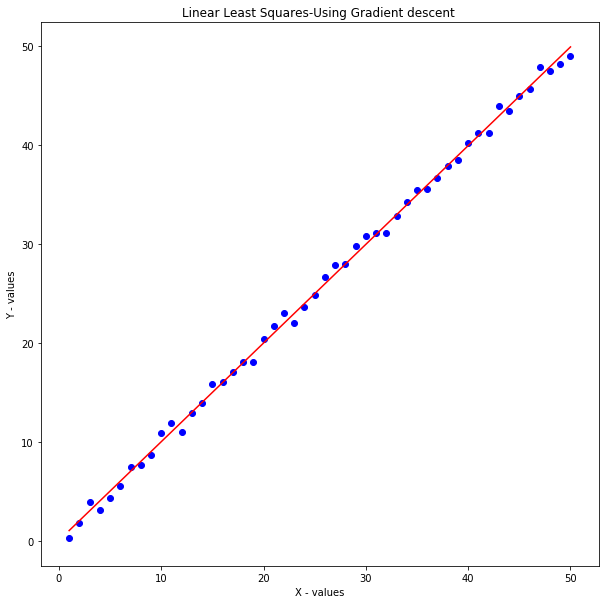

In [0]:
y_pred = m*np.array(x) + c

fig, ax = plt.subplots(figsize=(10,10))
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red') # regression line
plt.scatter(x, y, c = 'blue')
plt.ylabel('Y - values')
plt.xlabel('X - values')
plt.title('Linear Least Squares-Using Gradient descent ')
plt.show()

By using the Gradient descent,The Classes are classified more accuratly.

If we dont use the Gradient descent then the weights would change
randomly as long as they are satisfying the condition.

But in the Gradient descent case,the weights would just be
close to the optimal weights.